In [213]:
import pandas
import seaborn
import matplotlib.pyplot as plot
import numpy as np
import re
import copy

from skimage import io
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

def create_frame():
    frame = pandas.read_csv("data.csv")
    frame.isnull().any()
    return(frame)

frame = create_frame()
frame.dropna(inplace=True)
frame.head()
frame["Gender"] = preprocessing.LabelEncoder().fit_transform(frame["Gender"])
frame2 = frame.drop('User ID', axis=1)
data_normal = preprocessing.normalize(frame.drop('User ID', axis=1), axis=0)
frame_normal = pandas.DataFrame(data_normal, columns=frame2.columns)
a = frame_normal.drop('Purchased', axis=1)
b = frame2['Purchased']
columns = ["component" + str(i) for i in range(2)]

PCA

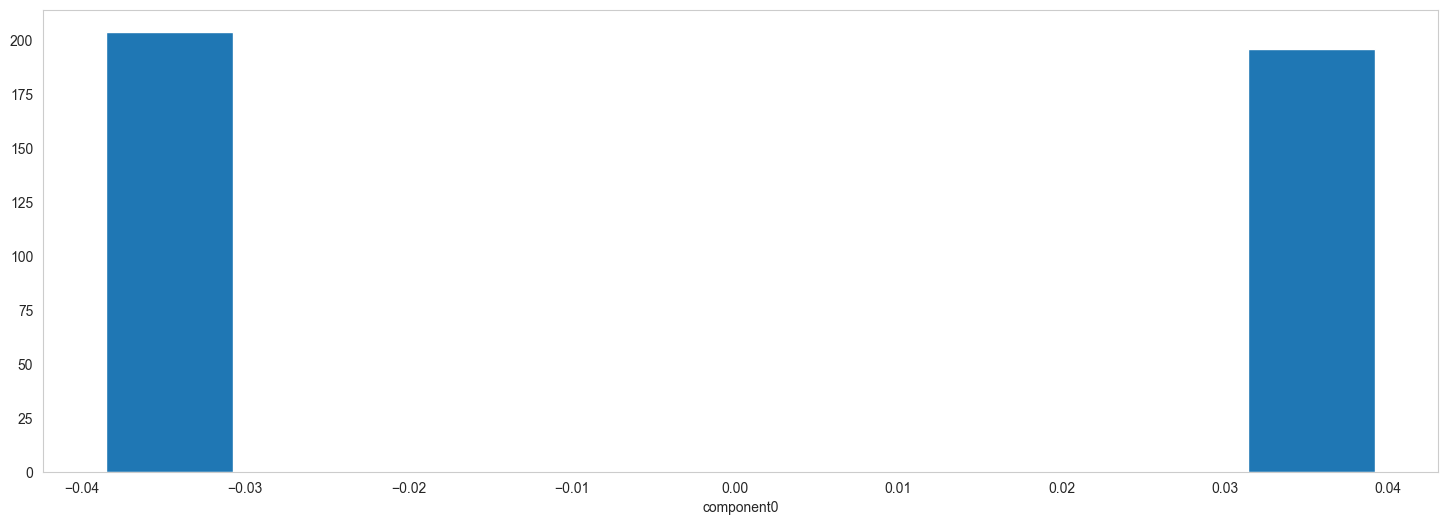

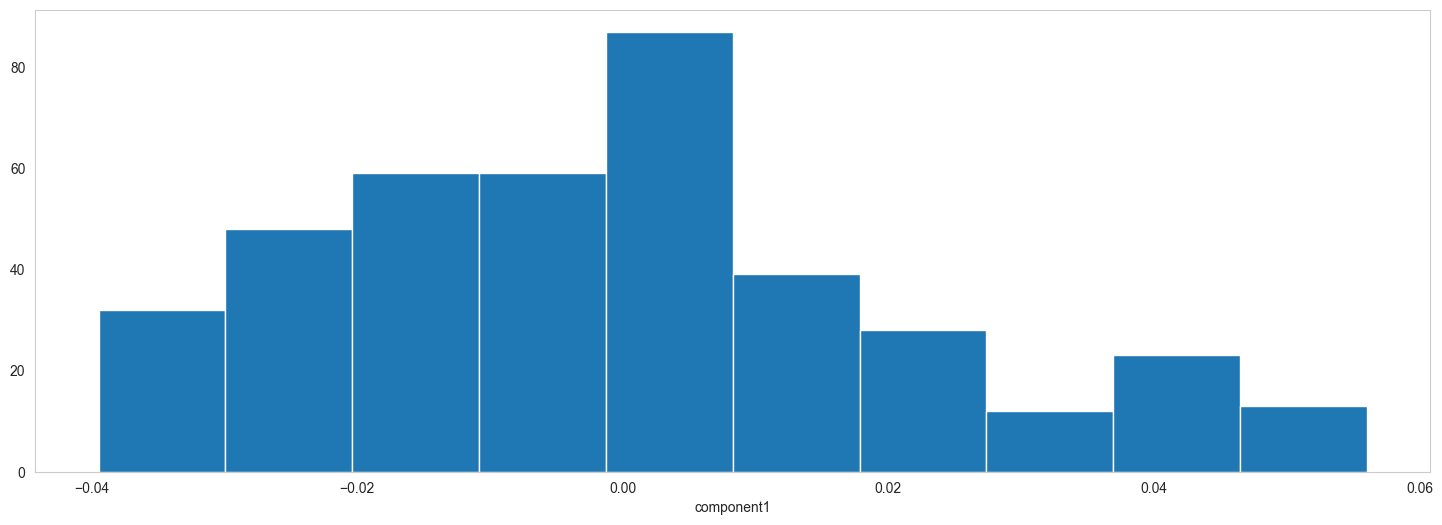

In [214]:
pca = PCA(n_components = 2)
a_pca = pca.fit_transform(a)
frame_pca = pandas.DataFrame(data = a_pca, columns = columns)
for i in range (len(frame_pca.columns)):
    plot.figure(figsize=(18,6))
    plot.hist(frame_pca[frame_pca.columns[i]])
    plot.xlabel(frame_pca.columns[i])
    plot.show()

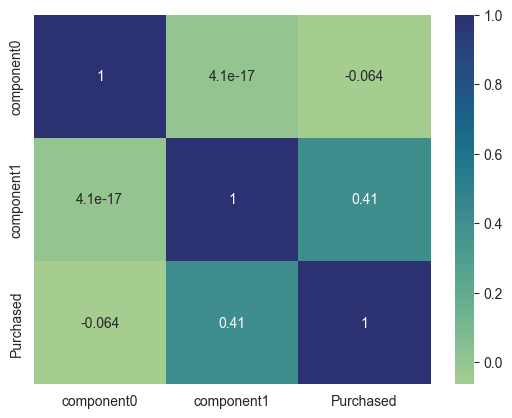

In [215]:
seaborn.set_style("whitegrid", {'axes.grid' : False})
frame_pca['Purchased'] = b
seaborn.heatmap(frame_pca.corr(), cmap="crest", annot=True)
plot.show()

TSNE

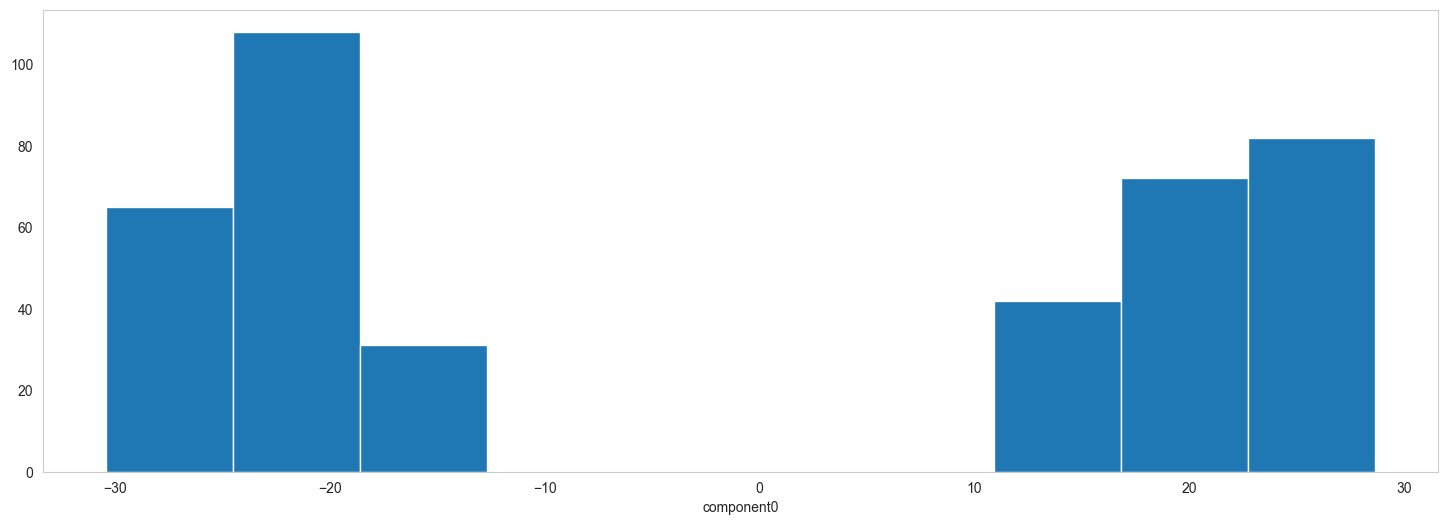

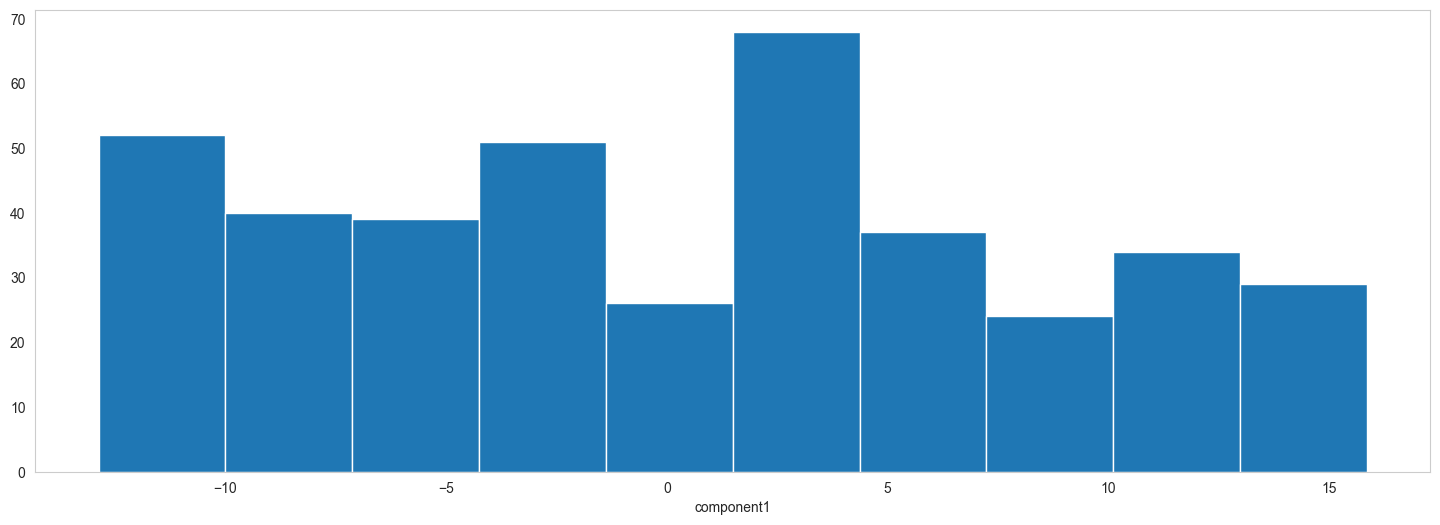

In [216]:
tsne = TSNE(n_components = 2)
a_tsne = tsne.fit_transform(a)
frame_tsne = pandas.DataFrame(data = a_tsne, columns = columns)
for i in range (len(frame_tsne.columns)):
    plot.figure(figsize=(18,6))
    plot.hist(frame_tsne[frame_tsne.columns[i]])
    plot.xlabel(frame_tsne.columns[i])
    plot.show()

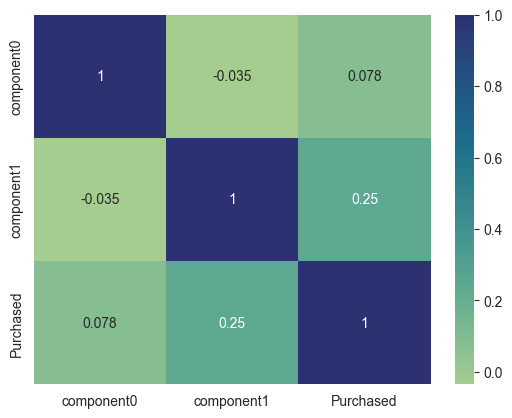

In [217]:
frame_tsne['Purchased'] = b
seaborn.heatmap(frame_tsne.corr(), cmap="crest", annot=True)
plot.show()

K-means

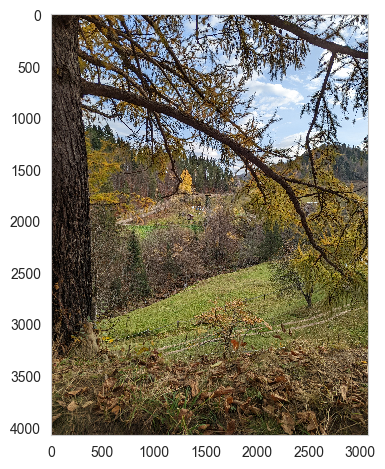

In [218]:
img = io.imread('image.jpg')
io.imshow(img)

In [219]:
img_arr = np.array(img, dtype=np.float64)/255
w, h, d = tuple(img_arr.shape)
assert d == 3
img_array_reshaped = np.reshape(img_arr, (w * h, d))

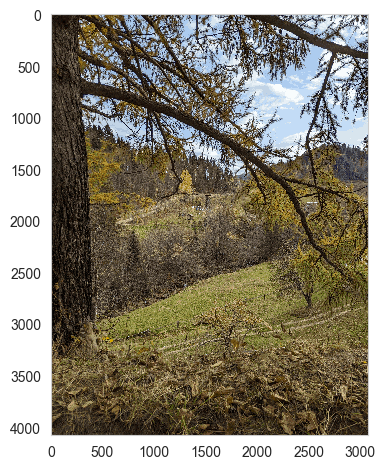

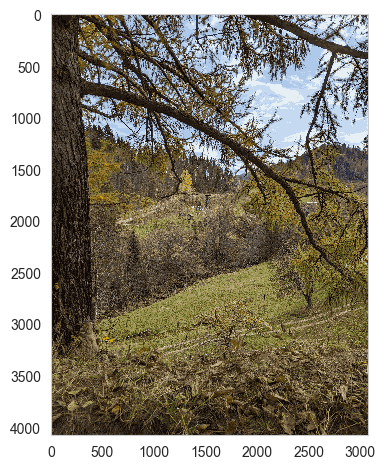

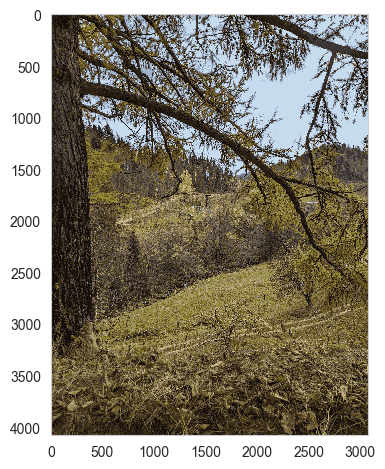

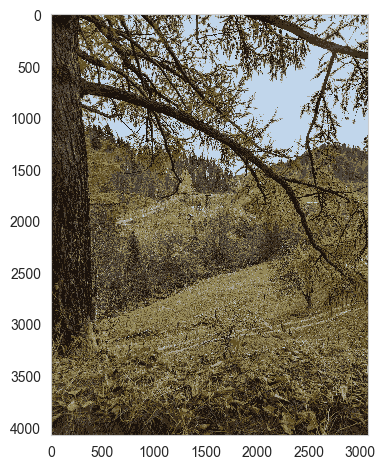

In [220]:
for n in [64, 32, 16, 8]:
    img_train = shuffle(img_array_reshaped, random_state=0, n_samples=1000)
    kmeans = KMeans(n_clusters=n, random_state=0, n_init='auto').fit(img_train)
    prediction = kmeans.predict(img_array_reshaped)
    io.imshow(kmeans.cluster_centers_[prediction].reshape(w, h, -1))
    plot.show()

Text

In [221]:
def create_text_frame():
    frame = pandas.read_csv('data_text.csv', index_col=False, encoding="utf8", nrows=10000)
    frame = pandas.DataFrame(frame)
    return frame

text_frame = create_text_frame()
text_frame.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [222]:
text_frame = text_frame.drop_duplicates()
text_frame['Category'] = preprocessing.LabelEncoder().fit_transform(text_frame['Category'])
text_frame['Message'] = [re.sub(r'[^\w\s]', '', str(message).lower()) for message in text_frame['Message']]
stop_words = set(stopwords.words('english'))
messages_no_sw = []
for message in text_frame['Message']:
    word_tokens = word_tokenize(message)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    messages_no_sw.append(' '.join(filtered_sentence))
text_frame['Message'] = messages_no_sw
text_frame.head()

,Category,Message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


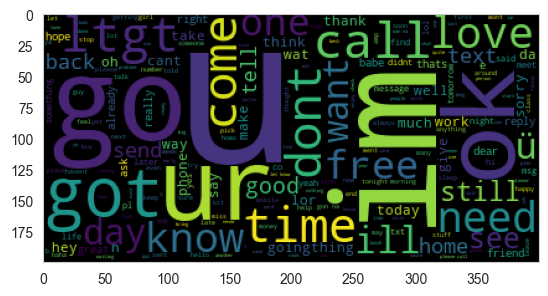

In [223]:
text = copy.deepcopy(text_frame['Message'])
text = ' '.join(text)
wordcloud = WordCloud(collocations=True).generate(text)
plot.imshow(wordcloud)
plot.show()

In [224]:
a = TfidfVectorizer().fit_transform(text_frame['Message'])
b = text_frame['Category']
a_train, a_test, b_train, b_test = train_test_split(a, b, train_size=0.5, random_state = 0)
k = list(range(2,30))
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': k,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}
grid = GridSearchCV(knn_classifier, param_grid).fit(a_train, b_train)
b_pred = grid.predict(a_test)
accuracy = accuracy_score(b_test, b_pred)
print("Точність: ", accuracy)
print(classification_report(b_test, b_pred)) 
print("Матриця неточності:")
print(confusion_matrix(b_test, b_pred)) 

Точність:  0.9274912756882513
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2254
           1       0.99      0.43      0.60       325

    accuracy                           0.93      2579
   macro avg       0.96      0.71      0.78      2579
weighted avg       0.93      0.93      0.91      2579

Матриця неточності:
[[2253    1]
 [ 186  139]]


Висновок.
В ході лабораторної роботи було проведено ознайомлення з кластерним аналізом і попередньою обробкою текстових данних. Як видно з отриманих точності, матриці неточності KNN досить гарно знаходить спам повідомлення.